<a href="https://colab.research.google.com/github/ntr1738/Ngawang-Rigdol-s-Portfolio/blob/main/Copy_of_QSI_Day_4_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 8: Multi-Qubit Circuits and Entanglement**
---

### **Description**
In today's lab, you will learn how to create and work with multi-qubit circuits. We will begin by reviewing how to build quantum circuits and apply quantum gates to those circuit. Next, we will begin creating and working with multi-qubit circuits. Then, we will use those circuits to create entanglement between qubits. Finally, we will represent the final states of qubits using histograms.

<br>

### **Lab Structure**
**Part 1**: [Creating Multi-Qubit Circuits](#p1)

**Part 2**: [Creating Entanglement with CNOT](#p2)

**Part 3**: [Working with Histograms](#p3)

**Part 4**: [Additional Practice [OPTIONAL]](#p4)

<br>


### **Learning Objectives**
By the end of this lab, we will:
1. Recognize how to implement multi-qubit circuits, including the CNOT gate, in Cirq.
2. Recognize how to simulate and interpret measurement results in Cirq.

<br>

###**Resources**
* [Cirq Basics Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M/edit?usp=drive_link)

<br>


**Before starting, run the code below to import all necessary functions and libraries.**


In [1]:
# @title
!pip install cirq --quiet
import cirq
import cirq_web
import numpy as np
import cirq_web.bloch_sphere as bloch_sphere
import matplotlib.pyplot as plt
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
print("Libraries imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.5/597.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.1/425.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.7 MB/s eta 0:00:00
Libraries imported successfully!


<a name="p1"></a>

---
## **Part 1: Creating Multi-Qubit Circuits**
---

### **Problem #1.1**

**Together,** create 3 qubits using the `range()` method. Output your qubits.

In [2]:
my_qubits = cirq.NamedQubit.range(3, prefix = 'q')

###**Problem #1.2**
**Together**, add a fourth qubit to the list below. Output your new list.

In [3]:
my_qubits = cirq.NamedQubit.range( 3, prefix = "q")
my_qubits.append(cirq.NamedQubit('q4'))

###**Problem #1.3**
**Together**, using the `range()` method, create 4 qubits.

In [4]:
my_qubits = cirq.NamedQubit.range(4, prefix = 'q')

###**Problem #1.4**
**Together,** create 100 qubits.

In [6]:
my_qubits = cirq.NamedQubit.range(100, prefix = 'q')
print(my_qubits)

[cirq.NamedQubit('q0'), cirq.NamedQubit('q1'), cirq.NamedQubit('q2'), cirq.NamedQubit('q3'), cirq.NamedQubit('q4'), cirq.NamedQubit('q5'), cirq.NamedQubit('q6'), cirq.NamedQubit('q7'), cirq.NamedQubit('q8'), cirq.NamedQubit('q9'), cirq.NamedQubit('q10'), cirq.NamedQubit('q11'), cirq.NamedQubit('q12'), cirq.NamedQubit('q13'), cirq.NamedQubit('q14'), cirq.NamedQubit('q15'), cirq.NamedQubit('q16'), cirq.NamedQubit('q17'), cirq.NamedQubit('q18'), cirq.NamedQubit('q19'), cirq.NamedQubit('q20'), cirq.NamedQubit('q21'), cirq.NamedQubit('q22'), cirq.NamedQubit('q23'), cirq.NamedQubit('q24'), cirq.NamedQubit('q25'), cirq.NamedQubit('q26'), cirq.NamedQubit('q27'), cirq.NamedQubit('q28'), cirq.NamedQubit('q29'), cirq.NamedQubit('q30'), cirq.NamedQubit('q31'), cirq.NamedQubit('q32'), cirq.NamedQubit('q33'), cirq.NamedQubit('q34'), cirq.NamedQubit('q35'), cirq.NamedQubit('q36'), cirq.NamedQubit('q37'), cirq.NamedQubit('q38'), cirq.NamedQubit('q39'), cirq.NamedQubit('q40'), cirq.NamedQubit('q41'), c

###**Problem #1.5**
**Together**, create 3 qubits. Add a measurement to the first qubit. Output your circuit.

In [10]:
my_qubits = cirq.NamedQubit.range(3, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.measure(my_qubits[0]))
print(my_circuit)

q0: ───M───


###**Problem #1.6**
**Together**, create 5 qubits. Add a measurement to each qubit. Output your circuit.

In [19]:
my_qubits = cirq.NamedQubit.range(5, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───M───
       │
q1: ───M───
       │
q2: ───M───
       │
q3: ───M───
       │
q4: ───M───


###**Problem #1.7**
**Independently**, create 5 qubits. Add an H gate to the the last qubit. Output your circuit.

In [17]:
my_qubits = cirq.NamedQubit.range(5, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubits[4]))
print(my_circuit)

q4: ───H───


###**Problem #1.8**
**Independently**, create 5 qubits. Add an X gate to each of them. Output your circuit.

In [29]:
my_qubits = cirq.NamedQubit.range(5, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X.on_each(my_qubits))
print(my_circuit)

q0: ───X───

q1: ───X───

q2: ───X───

q3: ───X───

q4: ───X───


###**Problem #1.9**
**Independently**, create 3 qubits. Add an X gate to the first, a Z gate to the second, and an H gate to the last. Add a measurement to each of them. Output your circuit.

In [48]:
my_qubits = cirq.NamedQubit.range(3, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.Z(my_qubits[1]))
my_circuit.append(cirq.H(my_qubits[2]))
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)




q0: ───X───M───
           │
q1: ───Z───M───
           │
q2: ───H───M───


###**Problem #1.10**
**Independently**, create 5 qubits. Add an H gate to each of them. Add a measurement to the first of them. Add an X gate to the second qubit. Add a Z gate to the last. Add a measurement to the last two qubits.

In [33]:
my_qubits = cirq.NamedQubit.range(5, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit.append(cirq.measure(my_qubits[0]))
my_circuit.append(cirq.X(my_qubits[1]))
my_circuit.append(cirq.Z(my_qubits[4]))
my_circuit.append(cirq.measure(my_qubits[4]))
my_circuit.append(cirq.measure(my_qubits[3]))
print(my_circuit)

q0: ───H───M───────

q1: ───H───X───────

q2: ───H───────────

q3: ───H───M───────

q4: ───H───Z───M───


<a name="p3"></a>

---
## **Part 2: Creating Entanglement with CNOT**
---


###**Problem #2.1**
**Together**, create two qubits. Create a circuit and add a CNOT gate such the the first qubit is the control and the second is the target. Output your circuit. Print out the ket representation of your circuit's final state.

In [50]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
print(my_circuit)

q0: ───@───
       │
q1: ───X───


In [51]:
state_vector = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation( state_vector=state_vector )
print(ket)

|00⟩


###**Problem #2.2**
**Together**, create two qubits. Create a circuit and add an H gate to the first qubit. Add a CNOT gate such the the first qubit is the control and the second is the target. Output your circuit. Print out the ket representation of your circuit's final state.

In [53]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
print(my_circuit)

q0: ───H───@───
           │
q1: ───────X───


In [55]:
state_vector = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation( state_vector=state_vector )
print(ket)

0.71|00⟩ + 0.71|11⟩


###**Problem #2.3**
**Independently**, Modify the circuit in Problem 2.2 to create a new entangled state by adding an initial X gate to one of the qubits. Output your circuit. Print out the ket representation of your circuit's final state.

In [57]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
print(my_circuit)

q0: ───X───H───@───
               │
q1: ───────────X───


In [60]:
state_vector = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation( state_vector=state_vector )
print(ket)

0.71|00⟩ - 0.71|11⟩


###**Problem #2.4**
**Independently**, add measurements to each of your qubits from your circuit in Problem #2.2. Simulate the results of your circuit. Output the results.

In [70]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───H───@───M───
           │   │
q1: ───────X───M───


###**Problem #2.5**
**Independently**, simulate the results from the circuit in Problem #2.3 10 times.

In [72]:
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions = 10)
print(results)

q0,q1=0110011101, 0110011101


###**Problem #2.6**
**Independently**, create two qubits. Create a circuit and add an X gate to the first qubit. Add a CNOT gate such the the first qubit is the control and the second is the target. Output your circuit. Print out the ket representation of your circuit's final state.

In [73]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))

print(my_circuit)

q0: ───X───@───
           │
q1: ───────X───


In [77]:
state_vector = cirq.final_state_vector(my_circuit)
ket = cirq.dirac_notation( state_vector=state_vector )
print(ket)

|11⟩


<a name="p4"></a>

---
## **Part 3: Working with Histograms**
---


###**Problem #3.1**
**Together**, create 3 qubits. Append those qubits to a circuit with a measurement. Simulate the results of your circuit 10 times. Then, create a histogram of the final states of the qubits.

In [80]:
my_qubits = cirq.NamedQubit.range(3, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───M───
       │
q1: ───M───
       │
q2: ───M───


In [85]:
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions = 10)
print(results)

q0,q1,q2=0000000000, 0000000000, 0000000000


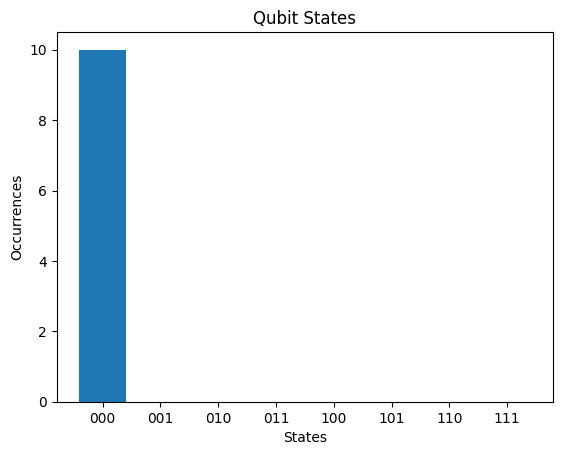

In [86]:
hist = cirq.plot_state_histogram(results, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

###**Problem #3.2**
**Together**, simulate the results of your circuit from Problem #2.3 10 times. Then, create a histogram of the final states of the qubits.

In [98]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───X───H───@───M───
               │   │
q1: ───────────X───M───


In [99]:
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions = 10)
print(results)

q0,q1=1000110110, 1000110110


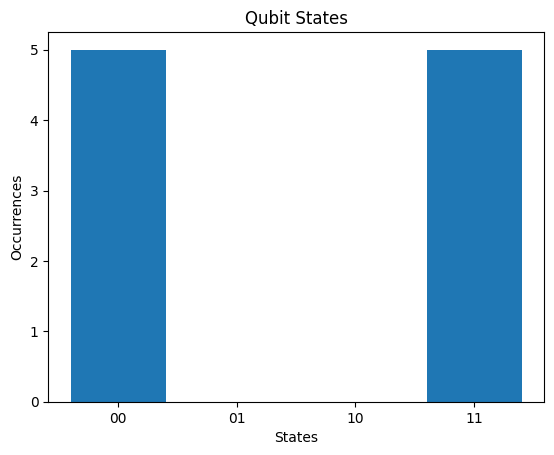

In [101]:
hist = cirq.plot_state_histogram(results, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

###**Problem #3.3**
**Independently**, repeat Problem #3.2, but with 100 repitions

In [102]:
my_qubits = cirq.NamedQubit.range(2, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(my_qubits[0]))
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───X───H───@───M───
               │   │
q1: ───────────X───M───


In [112]:
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions = 100)
print(results)

q0,q1=0101110100100110010111000001110110011001011001100001110010000110001111101011100101000110011000110101, 0101110100100110010111000001110110011001011001100001110010000110001111101011100101000110011000110101


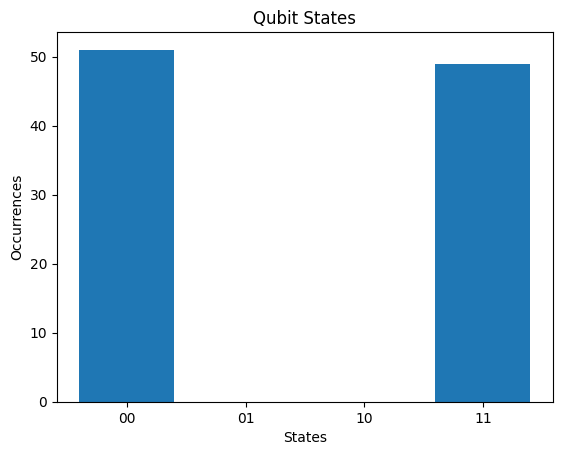

In [113]:
hist = cirq.plot_state_histogram(results, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

###**Problem #3.4**
**Independently**, create three qubits. Create an empty quantum circuit. Append an H gate and a measurement to each qubit. Simulate the results of the circuit 100 times. Plot the results on a histogram.

In [117]:
my_qubits = cirq.NamedQubit.range(3, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───H───M───
           │
q1: ───H───M───
           │
q2: ───H───M───


In [118]:
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions = 100)
print(results)

q0,q1,q2=0111000001101010010010111101010100110101110010001010101011100010101101000110011001110100001011100111, 1011010100101110010001000101001100001111110011000001010010110010011111111100001111010110101010010000, 1100100110001011101101111000001101000110011100011001001001000001000101000110110111000010010011111001


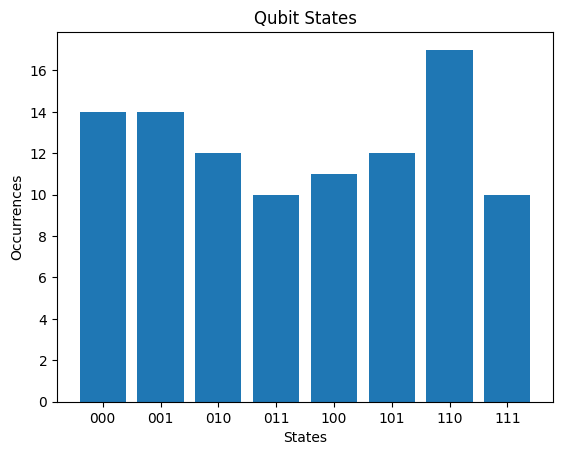

In [121]:
hist = cirq.plot_state_histogram(results, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

###**Problem #3.5**
**Independently**, create a circuit with 3 qubits. Append an H gate the the first qubit. Add a CNOT gate such that the first qubit is the control and the second is the target. Add another CNOT gate such that second qubit is the control and the third is the target. Append a measurement to each qubit. Output your circuit. Simulate the results of your circuit 1000 times. Output the results on a histogram. What is the name of this type of entangled state?

In [123]:
my_qubits = cirq.NamedQubit.range(3, prefix = 'q')
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(my_qubits[0]))
my_circuit.append(cirq.CNOT(my_qubits[0],my_qubits[1]))
my_circuit.append(cirq.CNOT(my_qubits[1],my_qubits[2]))
my_circuit.append(cirq.measure(my_qubits))
print(my_circuit)

q0: ───H───@───────M───
           │       │
q1: ───────X───@───M───
               │   │
q2: ───────────X───M───


In [124]:
sim = cirq.Simulator()
results = sim.run(my_circuit, repetitions = 100)
print(results)

q0,q1,q2=0010110001011001001110111111011101101111011111001110011111001001101110110011000010100100111111000100, 0010110001011001001110111111011101101111011111001110011111001001101110110011000010100100111111000100, 0010110001011001001110111111011101101111011111001110011111001001101110110011000010100100111111000100


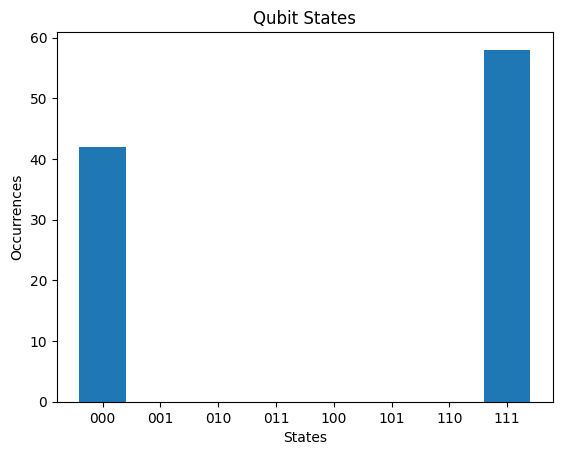

In [125]:
hist = cirq.plot_state_histogram(results, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

<a name="p5"></a>

---
## **Part 4: Additional Practice [OPTIONAL]**
---


###**Problem #4.1**
**Independently**, create three qubits. Add an H gate to each qubit, and a Z gate to the second. Output your circuit. Add a measurement to each circuit.

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
my_qubits = cirq.NamedQubit.range( 3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H.on_each(my_qubits))
my_circuit.append(cirq.Z(cirq.NamedQubit("q1")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

###**Problem #4.2**
**Independently**, simulate the results of your circuit from Problem #4.1 100 times. Output the results on a histogram.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

In [ ]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

###**Problem #4.3**
**Independently**, create three qubits. Append an X gate to each qubit.Append an H gate to the second qubit, then a Z gate to the second qubit. Append a measurement to each gate. Output your circuit.

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
my_qubits = cirq.NamedQubit.range( 3, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X.on_each(my_qubits))
my_circuit.append(cirq.H(cirq.NamedQubit("q1")))
my_circuit.append(cirq.Z(cirq.NamedQubit("q1")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

###**Problem #4.4**
**Independently**, Simulate the results of your circuit 100 times. Plot the results on a histogram.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

In [ ]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))

plt.show()

###**Problem #4.5**
**Independently**, create two qubits. Append the first to a circuit using an X gate. Append the second to the circuit using an H gate, then a Z gate. Next append a CNOT gate such that the second qubit is the target qubit and the first is the control qubit. Finally, add a measurement to each qubit. Output your circuit.

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
my_qubits = cirq.NamedQubit.range( 2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(cirq.NamedQubit("q0")))
my_circuit.append(cirq.H(cirq.NamedQubit("q1")))
my_circuit.append(cirq.Z(cirq.NamedQubit("q1")))
my_circuit.append(cirq.CNOT(cirq.NamedQubit("q0"), cirq.NamedQubit("q1")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

###**Problem #4.6**
**Independently**, simulate the results of your circuit 100 times. Plot the histogram.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

In [ ]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

###**Problem #4.7**
**Independently**, create a two qubits. Append the second qubit to the circuit using an X gate. Next, add a CNOT gate such that the first qubit is the target qubit and the second qubit is the control qubit. Append a measurement to both qubits. Output your circuit.

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
my_qubits = cirq.NamedQubit.range( 2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.X(cirq.NamedQubit("q1")))
my_circuit.append(cirq.CNOT(cirq.NamedQubit("q1"), cirq.NamedQubit("q0")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

###**Problem #4.8**
**Independently**, simulate the results of your circuit 100 times. Plot the histogram.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

In [ ]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

###**Problem #4.9**
**Independently**, create two qubits. Append the first qubit to the circuit using an H gate. Append the second qubit to the circuit using an X gate. Add a CNOT gate to the circuit such the the second qubit is the target and the first is the control. Append a measurement to each qubit. Output your circuit.

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
my_qubits = cirq.NamedQubit.range( 2, prefix = "q")
my_circuit = cirq.Circuit()
my_circuit.append(cirq.H(cirq.NamedQubit("q0")))
my_circuit.append(cirq.X(cirq.NamedQubit("q1")))
my_circuit.append(cirq.CNOT(cirq.NamedQubit("q0"), cirq.NamedQubit("q1")))
my_circuit.append(cirq.measure(my_qubits))
my_circuit

###**Problem #4.10**
**Independently**, simulate the results of your circuit 100 times. Plot the histogram.

In [ ]:
# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

#####**Solution**

In [ ]:
sim = cirq.Simulator()
result = sim.run(my_circuit, repetitions = 100)

In [ ]:
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

#End of notebook
---
© 2023 The Coding School, All rights reserved